In [1]:
!pip install gdown

!gdown --id 1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY

!unzip Teeth\ DataSet.zip -d dataset

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=e47ff7f5-a13f-4c90-b258-8b53a6fdb33a
To: /kaggle/working/Teeth DataSet.zip
100%|███████████████████████████████████████| 49.1M/49.1M [00:00<00:00, 170MB/s]
Archive:  Teeth DataSet.zip
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1239_0_6735.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1219_0_8165.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1245_0_3892.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1223_0_2790.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1230_0_9636.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1226_0_6144.jpg

In [24]:
import os, shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
base = "/kaggle/working/dataset/Teeth_Dataset"

for folder in os.listdir(base):
    print(folder, "->", os.listdir(f"{base}/{folder}"))

Validation -> ['CaS', 'Gum', 'MC', 'OC', 'OLP', 'OT', 'CoS']
Training -> ['CaS', 'Gum', 'MC', 'OC', 'OLP', 'OT', 'CoS']
Testing -> ['output', 'CaS', 'Gum', 'outputs', 'output_image.jpg', 'MC', 'OC', 'out', 'OLP', 'OT', 'CoS']


In [4]:
DATASET_PATH  = Path("/kaggle/working/dataset/Teeth_Dataset")
train = DATASET_PATH / "Training"
test = DATASET_PATH / "Testing"
out = DATASET_PATH / "Outside"
val = DATASET_PATH / "Validation"

os.makedirs(out, exist_ok=True)

labels = os.listdir(train)

for x in os.listdir(test):
    if x not in labels:
        shutil.move(f"{test}/{x}", f"{out}/{x}")

print("Testing cleaned")

Testing cleaned


In [5]:
rows = []

for split, root_dir in [("train", train), ("val", val),("test",test)]:
    for cls_dir in sorted(root_dir.iterdir()):
        if cls_dir.is_dir():
            for ext in ["*.jpg", "*.JPG"]:
                for img_path in cls_dir.glob(ext):
                    rows.append({
                        "split": split,
                        "label": cls_dir.name,
                        "path": str(img_path)
                    })

df = pd.DataFrame(rows)

print("Total images:", len(df))
print("Total classes:", df['label'].nunique())
print("Train/Val distribution:")
print(df['split'].value_counts())
print("*"*100)
print(df.head())

Total images: 5143
Total classes: 7
Train/Val distribution:
split
train    3087
val      1028
test     1028
Name: count, dtype: int64
****************************************************************************************************
   split label                                               path
0  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
1  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
2  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
3  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
4  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...


In [6]:
df_train = df[df['split'] == "train"]

print("Number of classes:", df_train['label'].nunique())
print("Train images per class:")
print(df_train['label'].value_counts())
print("*"*50)

df_val = df[df['split'] == "val"]

print("Number of classes:", df_val['label'].nunique())
print("Train images per class:")
print(df_val['label'].value_counts())
print("*"*50)

df_test = df[df['split'] == "test"]

print("Number of classes:", df_test['label'].nunique())
print("Train images per class:")
print(df_test['label'].value_counts())

Number of classes: 7
Train images per class:
label
MC     540
OLP    540
CaS    480
CoS    450
OT     393
Gum    360
OC     324
Name: count, dtype: int64
**************************************************
Number of classes: 7
Train images per class:
label
MC     180
OLP    180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64
**************************************************
Number of classes: 7
Train images per class:
label
MC     180
OLP    180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64


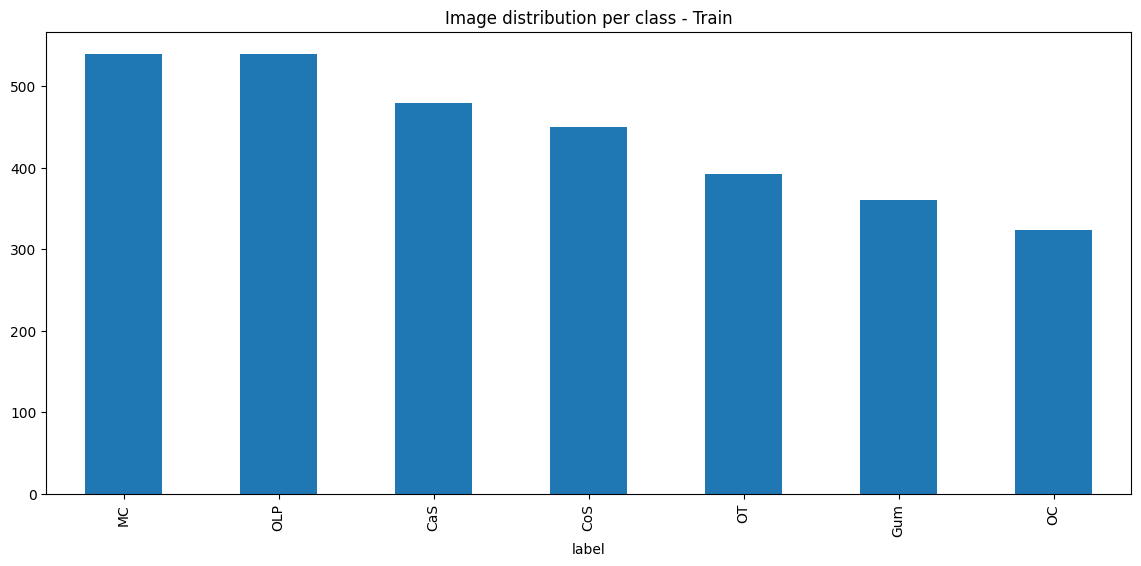

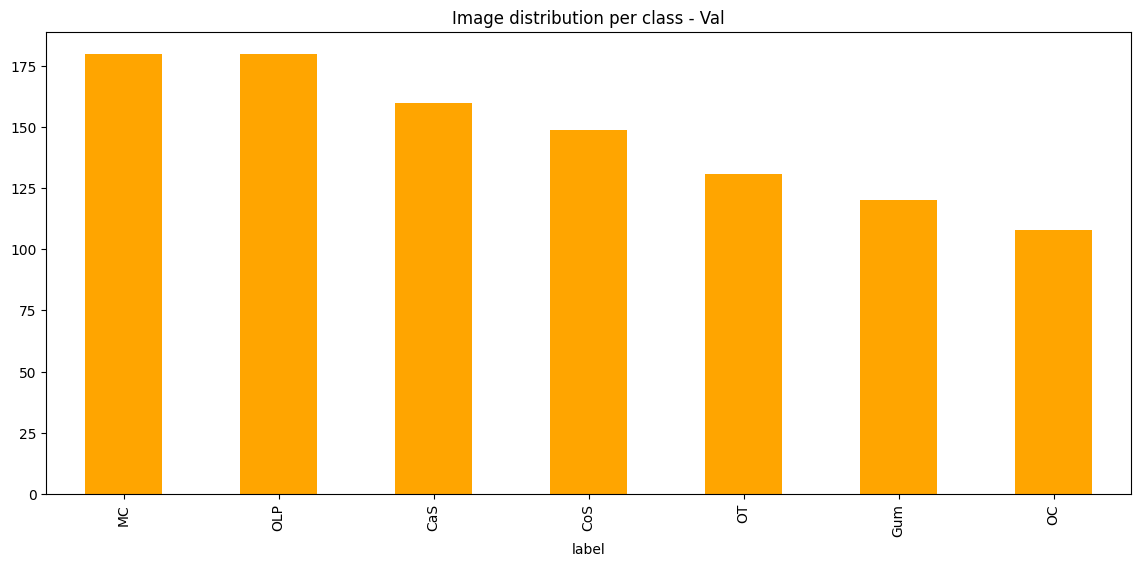

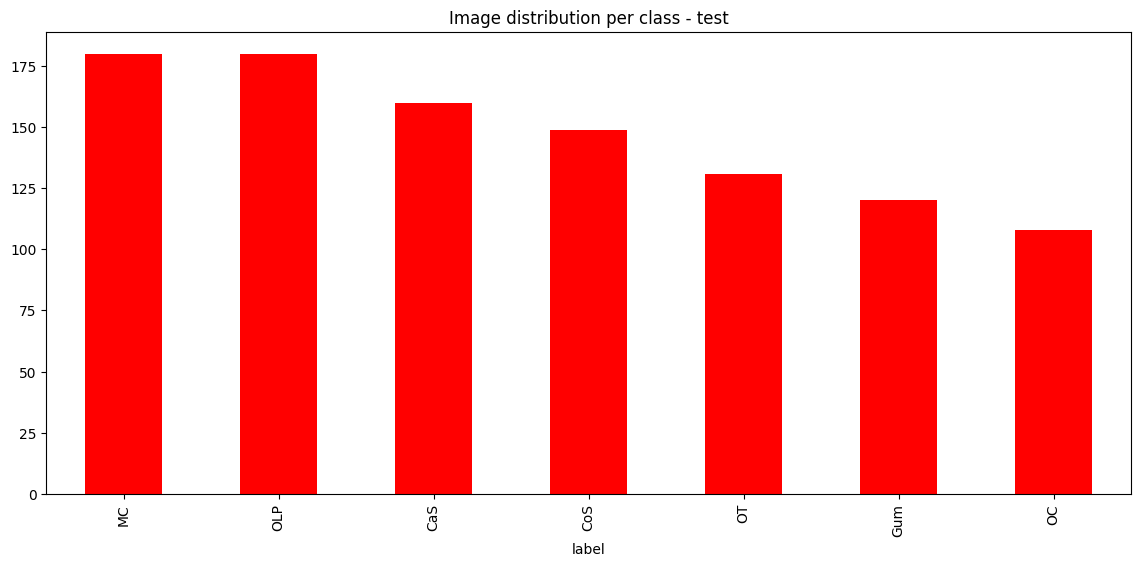

In [7]:
train_counts = df[df['split']=="train"]['label'].value_counts()
plt.figure(figsize=(14,6))
train_counts.plot(kind='bar')
plt.title("Image distribution per class - Train")
plt.xticks(rotation=90)
plt.show()

val_counts = df[df['split']=="val"]['label'].value_counts()
plt.figure(figsize=(14,6))
val_counts.plot(kind='bar', color="orange")
plt.title("Image distribution per class - Val")
plt.xticks(rotation=90)
plt.show()

val_counts = df[df['split']=="test"]['label'].value_counts()
plt.figure(figsize=(14,6))
val_counts.plot(kind='bar', color="red")
plt.title("Image distribution per class - test")
plt.xticks(rotation=90)
plt.show()

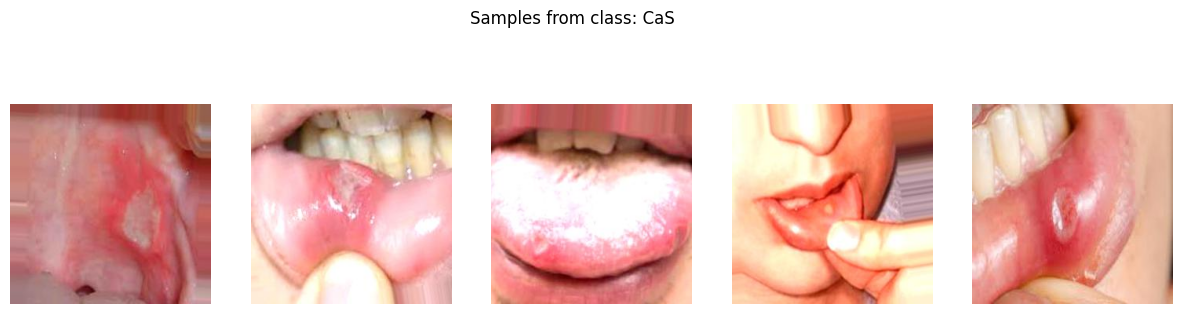

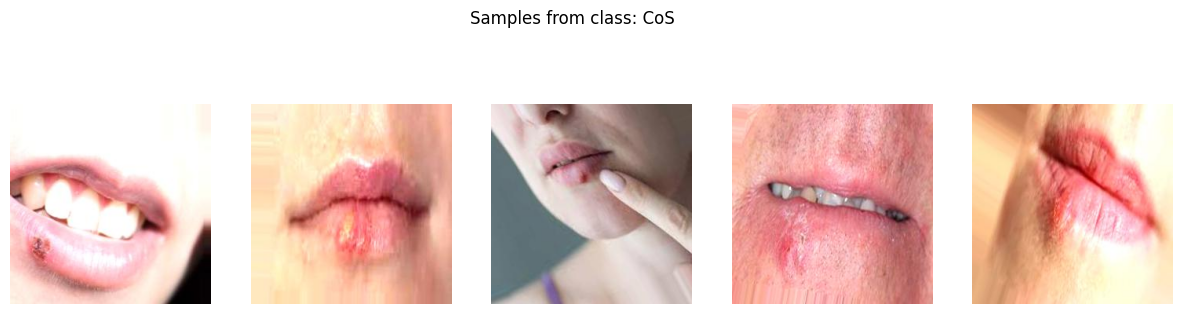

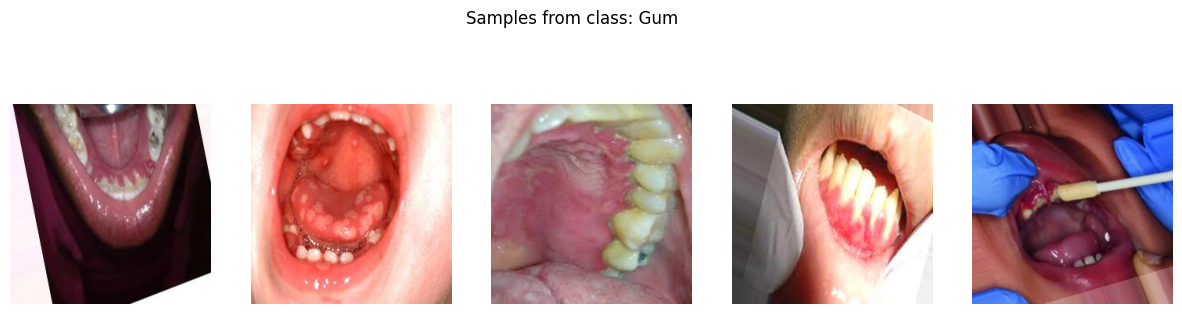

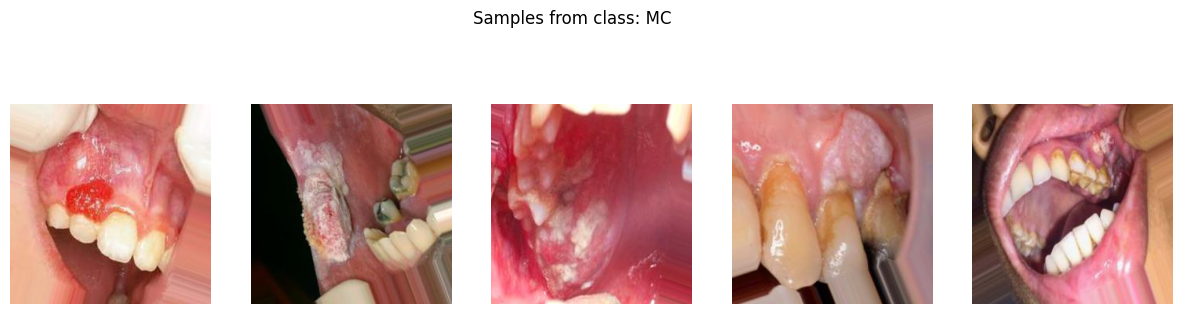

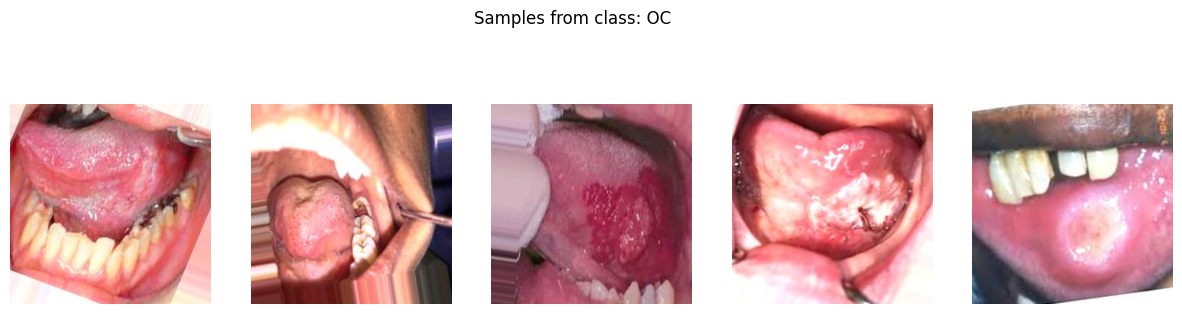

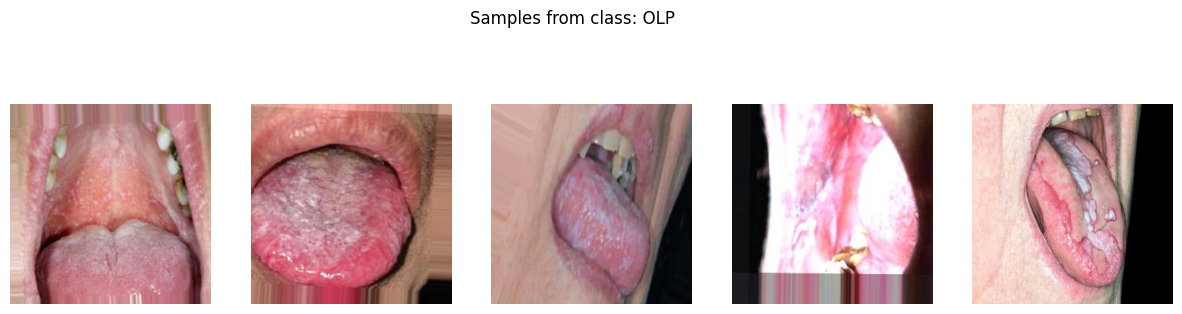

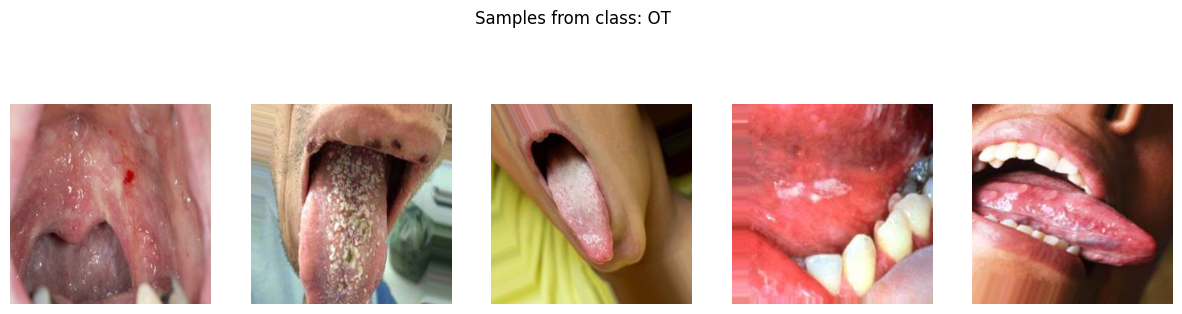

In [8]:
import random

def show_samples(label, n=5):
    subset = df[(df['label'] == label) & (df['split'] == "train")]['path'].tolist()
    sample = random.sample(subset, min(n, len(subset)))
    
    plt.figure(figsize=(15, 4))
    for i, p in enumerate(sample, 1):
        img = Image.open(p).convert("RGB")
        plt.subplot(1, len(sample), i)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Samples from class: {label}")
    plt.show()
    
for lbl in df['label'].unique()[:]: 
    show_samples(lbl, n=5)

In [9]:
from tqdm import tqdm
size_counts = {}

for img_path in tqdm(df['path'], desc="Reading image sizes"):
    with Image.open(img_path) as img:
        size = img.size 
        size_counts[size] = size_counts.get(size, 0) + 1

print("Unique sizes:", len(size_counts))
for size, count in size_counts.items():
    print(size, ":", count)

Reading image sizes: 100%|██████████| 5143/5143 [00:00<00:00, 16240.55it/s]

Unique sizes: 1
(256, 256) : 5143


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)


2026-02-05 18:51:50.879002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770317511.089221      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770317511.150156      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770317511.664688      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770317511.664737      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770317511.664740      55 computation_placer.cc:177] computation placer alr

In [11]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/kaggle/working/dataset/Teeth_Dataset/Training/CaS/a_100_0_1462.jpg"

img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


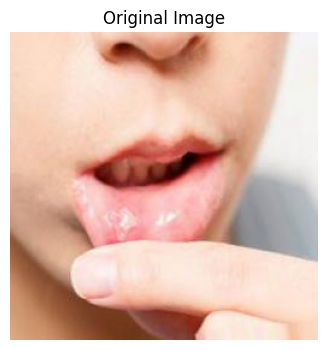

In [12]:
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

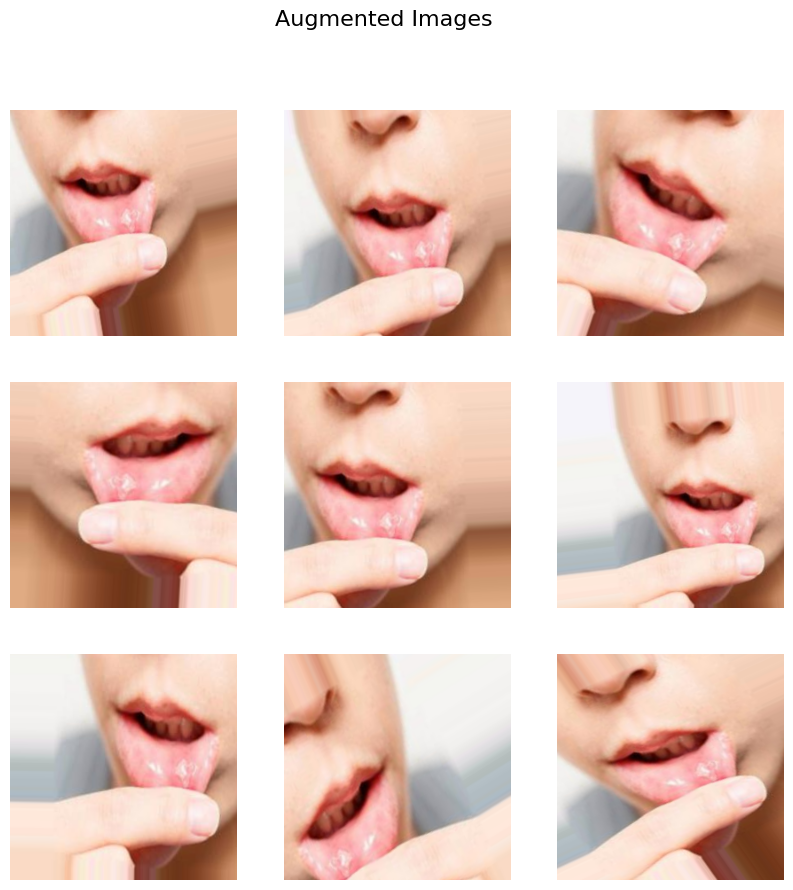

In [13]:
augmented_images = augment_datagen.flow(
    img_array,
    batch_size=1
)

plt.figure(figsize=(10,10))

for i in range(9):
    augmented_img = next(augmented_images)[0]
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_img)
    plt.axis("off")

plt.suptitle("Augmented Images", fontsize=16)
plt.show()


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

INPUT_DIR  = "/kaggle/working/dataset/Teeth_Dataset/Training"
OUTPUT_DIR = "/kaggle/working/dataset/Augmented_Trainings"

augment_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

NUM_IMAGES_PER_CLASS = 800

for class_name in os.listdir(INPUT_DIR):
    class_input = os.path.join(INPUT_DIR, class_name)
    class_output = os.path.join(OUTPUT_DIR, class_name)

    if not os.path.isdir(class_input):
        continue

    os.makedirs(class_output, exist_ok=True)

    generator = augment_datagen.flow_from_directory(
        INPUT_DIR,
        classes=[class_name],      
        target_size=(256,256),
        batch_size=1,
        class_mode=None,
        save_to_dir=class_output,  
        save_prefix='aug',
        save_format='jpg'
    )

    for i in range(NUM_IMAGES_PER_CLASS):
        next(generator)

print("Augmented images saved per class!")


Found 480 images belonging to 1 classes.
Found 360 images belonging to 1 classes.
Found 540 images belonging to 1 classes.
Found 324 images belonging to 1 classes.
Found 540 images belonging to 1 classes.
Found 393 images belonging to 1 classes.
Found 450 images belonging to 1 classes.
Augmented images saved per class!


In [29]:
rows = []

train = Path("/kaggle/working/dataset/Augmented_Trainings")

for split, root_dir in [("train", train)]:
    for cls_dir in sorted(root_dir.iterdir()):
        if cls_dir.is_dir():
            for ext in ["*.jpg", "*.JPG", "*.png"]:
                for img_path in cls_dir.glob(ext):
                    rows.append({
                        "split": split,
                        "label": cls_dir.name,
                        "path": str(img_path)
                    })

df = pd.DataFrame(rows)

print("Total images:", len(df))
print("Total classes:", df['label'].nunique())
print("Train/Val distribution:")
print(df['split'].value_counts())
print("*" * 100)
print(df.head())


Total images: 5600
Total classes: 7
Train/Val distribution:
split
train    5600
Name: count, dtype: int64
****************************************************************************************************
   split label                                               path
0  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
1  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
2  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
3  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
4  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=(256,256),   
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    val,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False           
)


Found 5600 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [31]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    CNN = tf.keras.Sequential([
    
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(256,256,3)),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Dense(df_train['label'].nunique(), activation='softmax')
    ])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,143 (6.24 MB)

 Trainable params: 1,635,143 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

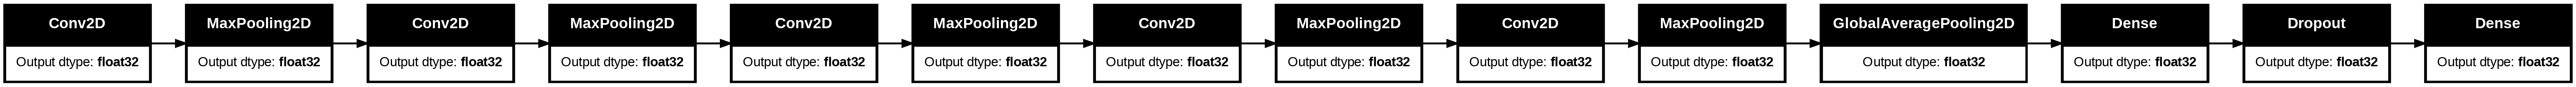

In [33]:
tf.keras.utils.plot_model(CNN, rankdir='LR',show_dtype=True)

In [34]:
with strategy.scope():
    CNN.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,               
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

training_history = CNN.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=100,            
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

I0000 00:00:1770318195.164900     166 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1770318197.072268     167 cuda_dnn.cc:529] Loaded cuDNN version 91002


175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1726 - loss: 1.9350INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.1727 - loss: 1.9349 - val_accuracy: 0.2305 - val_loss: 1.8746
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2134 - loss: 1.8785

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.2135 - loss: 1.8785 - val_accuracy: 0.2588 - val_loss: 1.8213
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.2407 - loss: 1.8410 - val_accuracy: 0.2510 - val_loss: 1.8222
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2875 - loss: 1.7829

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.2875 - loss: 1.7828 - val_accuracy: 0.3152 - val_loss: 1.6705
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3183 - loss: 1.7056

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.3183 - loss: 1.7056 - val_accuracy: 0.3424 - val_loss: 1.6390
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3451 - loss: 1.6601

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.3451 - loss: 1.6600 - val_accuracy: 0.3453 - val_loss: 1.5668
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.3579 - loss: 1.5939 - val_accuracy: 0.3307 - val_loss: 1.5637
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3838 - loss: 1.5420

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.3838 - loss: 1.5419 - val_accuracy: 0.3463 - val_loss: 1.5892
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4108 - loss: 1.4916

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.4108 - loss: 1.4915 - val_accuracy: 0.4553 - val_loss: 1.3696
Epoch 10/100
174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4516 - loss: 1.3993

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.4515 - loss: 1.3995 - val_accuracy: 0.4951 - val_loss: 1.3566
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4446 - loss: 1.3878 - val_accuracy: 0.4650 - val_loss: 1.3318
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4718 - loss: 1.3492

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.4718 - loss: 1.3490 - val_accuracy: 0.5058 - val_loss: 1.2492
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5053 - loss: 1.2702

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.5053 - loss: 1.2701 - val_accuracy: 0.5418 - val_loss: 1.1615
Epoch 14/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5337 - loss: 1.1992

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.5336 - loss: 1.1992 - val_accuracy: 0.5535 - val_loss: 1.1800
Epoch 15/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5662 - loss: 1.1429

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.5662 - loss: 1.1431 - val_accuracy: 0.5700 - val_loss: 1.1400
Epoch 16/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5921 - loss: 1.1141

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.5921 - loss: 1.1139 - val_accuracy: 0.6459 - val_loss: 0.9406
Epoch 17/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6247 - loss: 1.0214

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.6246 - loss: 1.0214 - val_accuracy: 0.6693 - val_loss: 0.9301
Epoch 18/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6147 - loss: 1.0167

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.6148 - loss: 1.0165 - val_accuracy: 0.6877 - val_loss: 0.8874
Epoch 19/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.6710 - loss: 0.8977 - val_accuracy: 0.6800 - val_loss: 0.8621
Epoch 20/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7042 - loss: 0.8064

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7042 - loss: 0.8062 - val_accuracy: 0.7393 - val_loss: 0.6670
Epoch 21/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7274 - loss: 0.7656

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.7274 - loss: 0.7655 - val_accuracy: 0.7850 - val_loss: 0.6009
Epoch 22/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7590 - loss: 0.7305

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.7590 - loss: 0.7302 - val_accuracy: 0.8132 - val_loss: 0.5378
Epoch 23/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7981 - loss: 0.5694 - val_accuracy: 0.7821 - val_loss: 0.6298
Epoch 24/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8284 - loss: 0.4974

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8284 - loss: 0.4973 - val_accuracy: 0.8551 - val_loss: 0.4368
Epoch 25/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8532 - loss: 0.4077 - val_accuracy: 0.8551 - val_loss: 0.3931
Epoch 26/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8605 - loss: 0.4076 - val_accuracy: 0.8298 - val_loss: 0.5261
Epoch 27/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8679 - loss: 0.3856

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8680 - loss: 0.3854 - val_accuracy: 0.8920 - val_loss: 0.3134
Epoch 28/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9028 - loss: 0.2851 - val_accuracy: 0.8745 - val_loss: 0.3567
Epoch 29/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9281 - loss: 0.2141 - val_accuracy: 0.8891 - val_loss: 0.3517
Epoch 30/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9223 - loss: 0.2372 - val_accuracy: 0.8911 - val_loss: 0.3444
Epoch 31/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9317 - loss: 0.2068

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9318 - loss: 0.2067 - val_accuracy: 0.9018 - val_loss: 0.3731
Epoch 32/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9194 - loss: 0.2598 - val_accuracy: 0.8366 - val_loss: 0.5139
Epoch 33/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9283 - loss: 0.2296

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9284 - loss: 0.2293 - val_accuracy: 0.9319 - val_loss: 0.2135
Epoch 34/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9693 - loss: 0.1005 - val_accuracy: 0.8881 - val_loss: 0.4272
Epoch 35/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9511 - loss: 0.1582 - val_accuracy: 0.9222 - val_loss: 0.2799
Epoch 36/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9652 - loss: 0.1129

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9651 - loss: 0.1130 - val_accuracy: 0.9368 - val_loss: 0.2367
Epoch 37/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9704 - loss: 0.1090 - val_accuracy: 0.8940 - val_loss: 0.3790
Epoch 38/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9646 - loss: 0.1072 - val_accuracy: 0.9193 - val_loss: 0.2824
Epoch 39/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.9631 - loss: 0.1164 - val_accuracy: 0.9173 - val_loss: 0.2459
Epoch 40/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9743 - loss: 0.0746 - val_accuracy: 0.9241 - val_loss: 0.2854
Epoch 41/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9794 - loss: 0.0634 - val_accuracy: 0.9212 - val_loss: 0.2467


In [36]:
test_loss, test_acc = CNN.evaluate(test_generator)
print("Test accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9312 - loss: 0.2592
Test accuracy: 0.9231517314910889


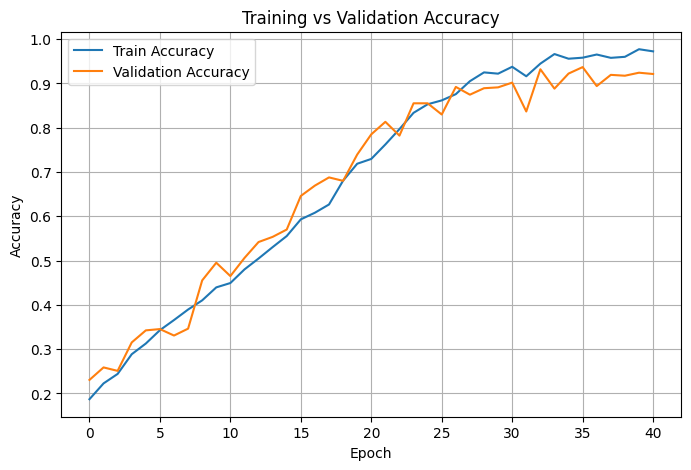

In [38]:
plt.figure(figsize=(8,5))

plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

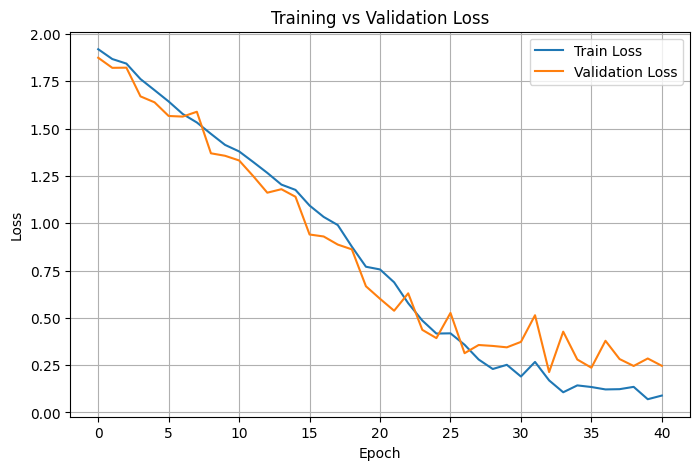

In [39]:
plt.figure(figsize=(8,5))

plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [41]:
CNN.save("teeth_classifier_model.h5")